In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset = pd.read_csv('dataset/dataset.csv')
lyrics = pd.read_csv('dataset/lyrics.csv')
previews = pd.read_csv('dataset/previews.csv')

In [27]:
dataset

,dzr_sng_id,dzr_sng_id_old,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,sample_size,sample_rate
0,215475,814317,SOHGLRR12A8C139D15,TRIWEQL128F4277E16,-0.780962,-0.789480,Sarah Slean,Mary,677376,22050
1,216237,216237,SOSMRCK12AB0182619,TRWKHHA128F932CE8D,-1.176640,-0.314720,CALLA,Strangler,677376,22050
2,364962,364962,SOITJIQ12A8C13A291,TRPFENS128F92DF6C6,1.541257,1.704165,Boney M,Rasputin,677376,22050
3,365067,365137,SOLMKTS12A8AE46C27,TRDHBPQ128F425EA1E,-0.569752,0.031901,Leona Lewis,Bleeding Love,677376,22050
4,365070,365070,SOLBFZJ12A8C1445B8,TRBQSQG12903CBD7D3,-0.981530,0.620973,Leona Lewis,Better in time,677376,22050
...,...,...,...,...,...,...,...,...,...,...
14853,1741134867,983850,SOEOMEF12A679D8AE4,TRMIMZV128E0793AC5,-1.040199,-0.065816,The Police,Bring On The Night,677376,22050
14854,1743726797,3117744,SOCMTSR12A67AD7416,TRIXMMD128F14A3AC4,0.957291,0.390507,K-OS,born to Run,661248,22050
14855,1748785967,6732040,SODQYZG12AB017CA3F,TRNMYSN128F9300B5D,0.815393,0.662457,Aesop Rock,Babies With Guns,661248,22050
14856,1748786397,1609782,SOXLIIZ12B0B807997,TRMIBNM128F429E5CB,0.373325,-0.923151,Aesop Rock,Daylight,661248,22050


In [91]:
previews

,dzr_sng_id,preview
0,215475,https://cdns-preview-7.dzcdn.net/stream/c-75f3...
1,216237,https://cdns-preview-9.dzcdn.net/stream/c-900f...
2,364962,https://cdns-preview-d.dzcdn.net/stream/c-de1d...
3,365067,https://cdns-preview-e.dzcdn.net/stream/c-ef72...
4,365070,https://cdns-preview-1.dzcdn.net/stream/c-1930...
...,...,...
14853,1741134867,https://cdns-preview-8.dzcdn.net/stream/c-8236...
14854,1743726797,https://cdns-preview-9.dzcdn.net/stream/c-97bb...
14855,1748785967,https://cdns-preview-7.dzcdn.net/stream/c-7148...
14856,1748786397,https://cdns-preview-2.dzcdn.net/stream/c-2927...


In [92]:
lyrics

,dzr_sng_id,lyrics
0,215475,She's looking out and out to a galaxy \r\nA fa...
1,216237,Something's gotten into your head \r\nSay what...
2,364962,There lived a certain man in Russia long ago\r...
3,365067,"Closed off from love, I didn't need the pain\r..."
4,365070,"Ooh, ooh\r\n\r\nIt's been the longest winter w..."
...,...,...
14853,1741134867,The afternoon has gently passed me by\r\nThe e...
14854,1743726797,"My heart, creep show, some old thing on the ra..."
14855,1748785967,\n\nRadio check check\nVideo check check\nThi...
14856,1748786397,"Yoput one up shackle me, not clean logic procr..."


In [93]:
((dataset.arousal < 0) & (dataset.valence < 0)).sum()

4279

In [94]:
((dataset.arousal > 0) & (dataset.valence < 0)).sum()

2856

In [95]:
((dataset.arousal < 0) & (dataset.valence > 0)).sum()

2841

In [96]:
((dataset.arousal > 0) & (dataset.valence > 0)).sum()

4882

(array([ 305.,  215., 1885., 2377., 3082., 2355., 2291., 1846.,  436.,
          66.]),
 array([-2.33360415, -1.82473466, -1.31586517, -0.80699567, -0.29812618,
         0.21074331,  0.71961281,  1.2284823 ,  1.73735179,  2.24622129,
         2.75509078]),
 <BarContainer object of 10 artists>)

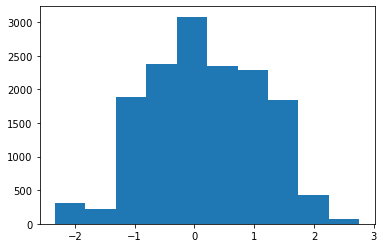

In [97]:
plt.hist(dataset.arousal)

(array([ 853., 1116., 1890., 1030., 1659.,  846., 1810., 1078., 2582.,
        1994.]),
 array([-2.1480972 , -1.77861604, -1.40913487, -1.03965371, -0.67017254,
        -0.30069138,  0.06878979,  0.43827095,  0.80775212,  1.17723328,
         1.54671445]),
 <BarContainer object of 10 artists>)

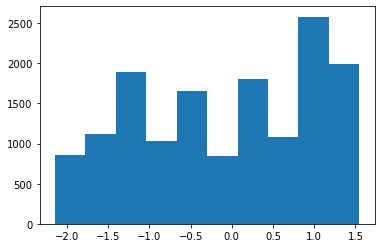

In [98]:
plt.hist(dataset.valence)

In [100]:
from mutagen.mp3 import MP3

durations = []
for i, file in dataset.iterrows():
    try:
        audio = MP3("dataset/previews/mp3/" + str(file.dzr_sng_id) + '.mp3')
        durations.append({'dzr_sng_id':  file.dzr_sng_id, 'duration':audio.info.length})
    except Exception as e:
        print(e)
        durations.append({'dzr_sng_id': file.dzr_sng_id, 'duration':-1})

In [101]:
df_duration = pd.DataFrame(durations)

In [102]:
df_duration.describe()

,dzr_sng_id,duration
count,1.485800e+04,14858.000000
mean,1.835045e+08,30.682282
std,3.637017e+08,0.777334
min,2.154750e+05,28.995875
25%,2.518615e+06,30.720000
50%,1.317714e+07,30.720000
75%,1.052812e+08,30.720000
max,1.748787e+09,122.880000


In [49]:
dataset = dataset.merge(df_duration, on='dzr_sng_id', how='left')
dataset = dataset[dataset.duration > 20]
dataset = dataset.reset_index()
del dataset['index']
dataset.to_csv('dataset/dataset.csv', index=None)

In [86]:
lyrics = lyrics[lyrics.dzr_sng_id.isin(dataset.dzr_sng_id)]
lyrics = lyrics.reset_index()
del lyrics['index']
lyrics.to_csv('dataset/lyrics.csv', index=None)

In [88]:
previews = previews[previews.dzr_sng_id.isin(dataset.dzr_sng_id)]
previews = previews.reset_index()
del previews['index']
previews.to_csv('dataset/previews.csv', index=None)

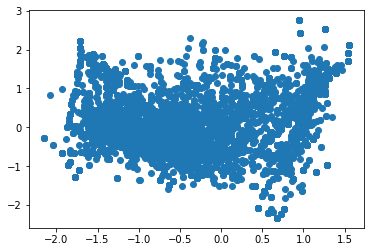

In [9]:
plt.scatter(dataset['valence'], dataset['arousal'])